<a href="https://colab.research.google.com/github/SauSauN/Analyse-domaine-m-dicament/blob/main/Lab_3_ESIEEMedic_Analyse_domaine_m%C3%A9dicament.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab_3_ESIEEMedic_Analyse_domaine_médicament**

In [225]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Énoncé
Après avoir regardé le dernier reportage d'un magasine d'investigation sur l'industrie pharmaceutique, vous vous posez dorénavant beaucoup de questions. Afin de vous faire votre propre opinion de ce vaste monde vous avez pris l'initiative d'enquêter avec vos compétences en data science. Après un rapide tour d'horizon des données à disposition, vous vous tournez une fois de plus vers l'open data.

## Mission
L'Agence nationale de sécurité du médicament et la haute autorité de santé mettent à disposition en open data plusieurs fichiers référençant les médicaments disponibles sur le territoire français. Sont disponibles des informations comme la dénomination du médicament, la forme pharmaceutique, le statut de la mise sur le marché, le prix, le taux de remboursement, les substances actives et bien d'autres !

Il est donc tant de partir enquêter, **il faut d'abord se familiariser avec les données, nettoyer puis analyser !**

# Exercice
## Partie 1 - Analyse des mises sur le marché
### 1 - Chargement des données
Téléchargez le fichier des spécialités `CIS_bdpm.txt` disponible [ici](http://base-donnees-publique.medicaments.gouv.fr/telechargement.php?fichier=CIS_bdpm.txt) puis chargez le à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df_spe`.

Comme indiqué dans [la documentation des données](http://base-donnees-publique.medicaments.gouv.fr/docs/Contenu_et_format_des_fichiers_telechargeables_dans_la_BDM_v1.pdf), les colonnes du fichier sont uniquement séparées par des tabulations.

Trouvez le paramètre de la fonction `read_csv` adapté :
- les colonnes sont séparées par des tabulations
- il n'y a pas de header (ligne contenant le nom des colonnes)
- l'encodage à utiliser est *iso-8859-1*

In [226]:

file_path_cis_bdpm = '/content/drive/My Drive/Colab Notebooks/rendre/cis_bdpm.txt.txt'

df_spe = pd.read_csv(
    file_path_cis_bdpm,
    sep='\t',
    header=None,
    encoding='iso-8859-1'
)

Pouvez-vous afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées ?

In [227]:
df_spe.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,61266250,"A 313 200 000 UI POUR CENT, pommade",pommade,cutanée,Autorisation active,Procédure nationale,Commercialisée,12/03/1998,NaN,NaN,PHARMA DEVELOPPEMENT,Non
1,62869109,"A 313 50 000 U.I., capsule molle",capsule molle,orale,Autorisation active,Procédure nationale,Commercialisée,07/07/1997,NaN,NaN,PHARMA DEVELOPPEMENT,Non
2,62401060,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,21/02/2018,NaN,NaN,MYLAN SAS,Non
3,63797011,"ABACAVIR SANDOZ 300 mg, comprimé pelliculé séc...",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,30/12/2016,NaN,NaN,SANDOZ,Non
4,62828870,"ABACAVIR/LAMIVUDINE ARROW 600 mg/300 mg, compr...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,15/12/2017,NaN,NaN,ARROW GENERIQUES,Non


C'est une façon très simple de vérifier que des données sont correctement chargées !

On voit d'ailleurs ici que le nom des colonnes est absent, il faut corriger cela en utilisant le fichier de description des données.

Remplacez le nom des colonnes par le descriptif suivant :

In [228]:
colonnes_spe = [
    'Code CIS',
    'Denomination',
    'Forme Pharmaceutique',
    'Voies Administration',
    'Statut Administratif',
    'Type Procedure',
    'Etat Commercialisation',
    'Date AMM',
    'Statut Bdm',
    'Numero Autorisation',
    'Titulaires',
    'Surveillance'
]

In [229]:
df_spe.columns = colonnes_spe

Affichez de nouveau les 5 premières lignes.

In [230]:
df_spe.head(5)

,Code CIS,Denomination,Forme Pharmaceutique,Voies Administration,Statut Administratif,Type Procedure,Etat Commercialisation,Date AMM,Statut Bdm,Numero Autorisation,Titulaires,Surveillance
0,61266250,"A 313 200 000 UI POUR CENT, pommade",pommade,cutanée,Autorisation active,Procédure nationale,Commercialisée,12/03/1998,NaN,NaN,PHARMA DEVELOPPEMENT,Non
1,62869109,"A 313 50 000 U.I., capsule molle",capsule molle,orale,Autorisation active,Procédure nationale,Commercialisée,07/07/1997,NaN,NaN,PHARMA DEVELOPPEMENT,Non
2,62401060,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,21/02/2018,NaN,NaN,MYLAN SAS,Non
3,63797011,"ABACAVIR SANDOZ 300 mg, comprimé pelliculé séc...",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,30/12/2016,NaN,NaN,SANDOZ,Non
4,62828870,"ABACAVIR/LAMIVUDINE ARROW 600 mg/300 mg, compr...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,15/12/2017,NaN,NaN,ARROW GENERIQUES,Non


Affichez les 10 premières lignes de la colonne Dénomination à l'aide de la fonction `iloc`.

In [231]:
df_spe.iloc[0:10, 1]

,Denomination
0,"A 313 200 000 UI POUR CENT, pommade"
1,"A 313 50 000 U.I., capsule molle"
2,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable"
3,"ABACAVIR SANDOZ 300 mg, comprimé pelliculé séc..."
4,"ABACAVIR/LAMIVUDINE ARROW 600 mg/300 mg, compr..."
5,"ABACAVIR/LAMIVUDINE BIOGARAN 600 mg/300 mg, co..."
6,"ABACAVIR/LAMIVUDINE EG 600 mg/300 mg, comprimé..."
7,"ABACAVIR/LAMIVUDINE MYLAN 600 mg/300 mg, compr..."
8,"ABACAVIR/LAMIVUDINE SANDOZ 600 mg/300 mg, comp..."
9,"ABACAVIR/LAMIVUDINE TEVA 600 mg/300 mg, compri..."


### 2 - Le dataframe

Combien de lignes et colonnes sont contenues dans `df_spe` ?

In [232]:
df_spe.shape

(15203, 12)

Maintenant il serait utile d'avoir quelques **info**rmations sur le type de chacune des colonnes.

In [233]:
df_spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code CIS                15203 non-null  int64 
 1   Denomination            15203 non-null  object
 2   Forme Pharmaceutique    15203 non-null  object
 3   Voies Administration    15203 non-null  object
 4   Statut Administratif    15203 non-null  object
 5   Type Procedure          15203 non-null  object
 6   Etat Commercialisation  15203 non-null  object
 7   Date AMM                15203 non-null  object
 8   Statut Bdm              1947 non-null   object
 9   Numero Autorisation     1698 non-null   object
 10  Titulaires              15203 non-null  object
 11  Surveillance            15203 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB


Il y a presque exclusivement des colonnes de type `object`, elles correspondent à des chaines de caractères. Le jeu de données utilise 1.4 Mo de mémoire RAM (c'est très peu).

La colonne Date AMM qui est une date, n'est pas bien typée, corrigez cela en utilisant un type `datetime64`.

In [234]:
df_spe['Date AMM'] = pd.to_datetime(df_spe['Date AMM'], format='%d/%m/%Y')

df_spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Code CIS                15203 non-null  int64         
 1   Denomination            15203 non-null  object        
 2   Forme Pharmaceutique    15203 non-null  object        
 3   Voies Administration    15203 non-null  object        
 4   Statut Administratif    15203 non-null  object        
 5   Type Procedure          15203 non-null  object        
 6   Etat Commercialisation  15203 non-null  object        
 7   Date AMM                15203 non-null  datetime64[ns]
 8   Statut Bdm              1947 non-null   object        
 9   Numero Autorisation     1698 non-null   object        
 10  Titulaires              15203 non-null  object        
 11  Surveillance            15203 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
mem

### 3 - Qualité des données

Quel est le pourcentage de valeurs manquantes par colonne ?

In [235]:
missing_values_pct = (df_spe.isnull().sum() / len(df_spe)) * 100

missing_values_pct

,0
Code CIS,0.000000
Denomination,0.000000
Forme Pharmaceutique,0.000000
Voies Administration,0.000000
Statut Administratif,0.000000
Type Procedure,0.000000
Etat Commercialisation,0.000000
Date AMM,0.000000
Statut Bdm,87.193317
Numero Autorisation,88.831152


Remplacez les valeurs manquantes par la valeur `Inconnu`.

In [236]:
df_spe = df_spe.fillna('Inconnu')

Existe-t-il des duplicatas ?



In [237]:
nb_duplicatas = df_spe.duplicated().sum()

print(nb_duplicatas)

0


### 4 - Analyse des données

Quel est le nombre de formes pharmaceutiques différentes ?

In [238]:
nb_formes = df_spe['Forme Pharmaceutique'].nunique()

print(nb_formes)

411


Quel est le nombre de voies d'administration différentes ?

In [239]:
nb_voies = df_spe['Voies Administration'].nunique()

print(nb_voies)

150


Affichez la répartition des statuts administratifs.

In [240]:
repartition = df_spe['Statut Administratif'].value_counts()
repartition

,count
Statut Administratif,
Autorisation active,14211
Autorisation abrogée,782
Autorisation archivée,193
Autorisation suspendue,9
Autorisation retirée,8


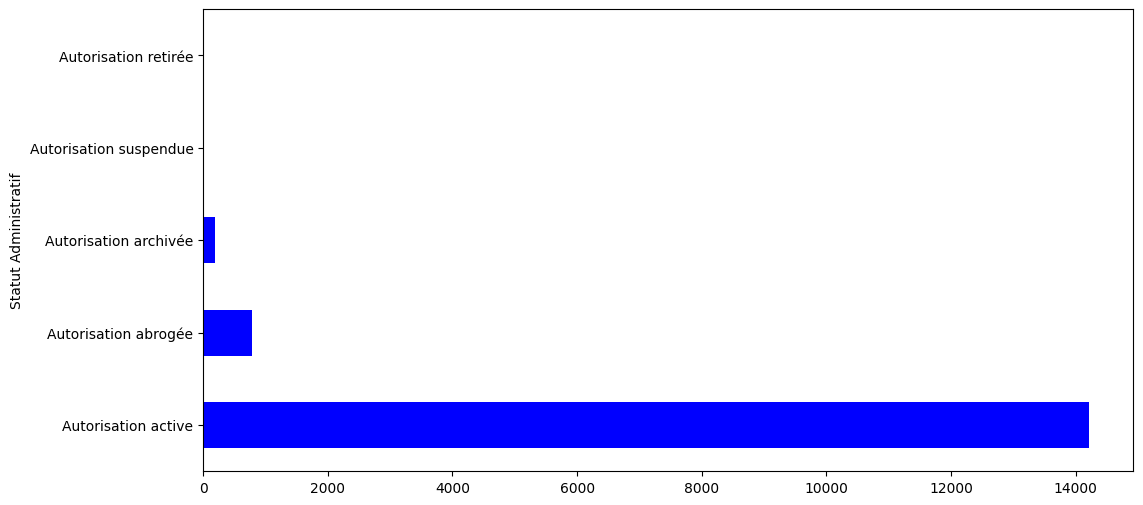

In [241]:
import matplotlib.pyplot as plt

# Calcul de la répartition
statut_counts = df_spe['Statut Administratif'].value_counts()

# Création du graphique horizontal
plt.figure(figsize=(12, 6))
statut_counts.plot(kind='barh', color='blue')

# Sauvegarde et affichage
plt.savefig('repartition_statuts.png')

### Plus de détails sur le statut des autorisations de mise sur le marché :

L’autorisation de mise sur le marché d’un médicament est dite « **archivée** » notamment dans les situations suivantes :

- le titulaire n’a pas demandé son renouvellement ;
- le médicament n’a jamais été ou n’est plus commercialisé depuis au moins trois ans (sauf exceptions).

Cette situation est généralement liée à des raisons commerciales (et non à des problèmes de santé publique) et est définitive. [source](https://solidarites-sante.gouv.fr/soins-et-maladies/medicaments/glossaire/article/autorisation-d-amm-archivee)

--------
A la demande du titulaire de l’autorisation de mise sur le marché (le plus souvent, un laboratoire pharmaceutique), une AMM peut être supprimée par l’Agence nationale de sécurité du médicament et des produits de santé (ANSM). Elle est dans ce cas dite « **abrogée** ». Cette décision est généralement motivée par le titulaire pour des raisons commerciales (et non liées à des problèmes de santé publique) et est définitive. [source](https://solidarites-sante.gouv.fr/soins-et-maladies/medicaments/glossaire/article/autorisation-d-amm-abrogee)

-----------
Le retrait d’une autorisation de mise sur le marché d’un médicament est une décision prise par la Commission européenne ou l’ANSM afin de faire cesser définitivement la distribution d’un médicament. Elle est dans ce cas dite « **retirée** ». Cette décision est prise pour des raisons de santé publique, notamment lorsqu’il apparaît que l’évaluation du bénéfice du médicament au regard des risques liés à sa qualité, à sa sécurité ou à son efficacité n’est pas considérée comme favorable. La décision de retrait d’autorisation est définitive. [source](https://solidarites-sante.gouv.fr/soins-et-maladies/medicaments/glossaire/article/autorisation-d-amm-retiree)

-----------
La suspension d’une autorisation de mise sur le marché est une mesure temporaire, le plus souvent urgente, prise par la Commission européenne ou l’ANSM, afin de faire cesser la mise à disposition d’un médicament, dans l’intérêt des patients. La durée de la suspension ne peut excéder 1 an et peut aboutir à son retrait. Elle est dans ce cas dite « **suspendue** ».

En savoir plus : la décision de suspension d’AMM intervient notamment lorsqu’il apparaît que le médicament est nocif dans les conditions normales d’emploi ou que l’effet thérapeutique fait défaut ou que le médicament n’a pas la composition quantitative et qualitative déclarée.

La décision de suspension d’une AMM peut être levée ou l’AMM retirée définitivement, selon les données complémentaires alors disponibles. [source](https://solidarites-sante.gouv.fr/soins-et-maladies/medicaments/glossaire/article/autorisation-d-amm-suspendue)

---------

Les médicaments potentiellement dangeureux sont donc dans les catégories suivantes : suspendue et retirée. Quels sont les titulaires des médicaments dont l'autorisation est suspendue ou retirée ? (utiliser la fonction `isin`)

In [242]:
statuts_dangereux = ['Autorisation suspendue', 'Autorisation retirée']

# Filtrage du DataFrame avec la fonction isin
df_suspendus_retires = df_spe[df_spe['Statut Administratif'].isin(statuts_dangereux)]

# Comptage des occurrences par titulaire
resultat = df_suspendus_retires['Titulaires'].value_counts()

resultat

,count
Titulaires,
SANDOZ,2
SANOFI AVENTIS FRANCE,2
BAYER HEALTHCARE,2
LES LABORATOIRES SERVIER,2
PFIZER HOLDING FRANCE,2
GE HEALTHCARE,2
LABORATOIRES GERDA,1
EG LABO - LABORATOIRES EUROGENERICS,1
LABORATOIRES IPRAD PHARMA,1


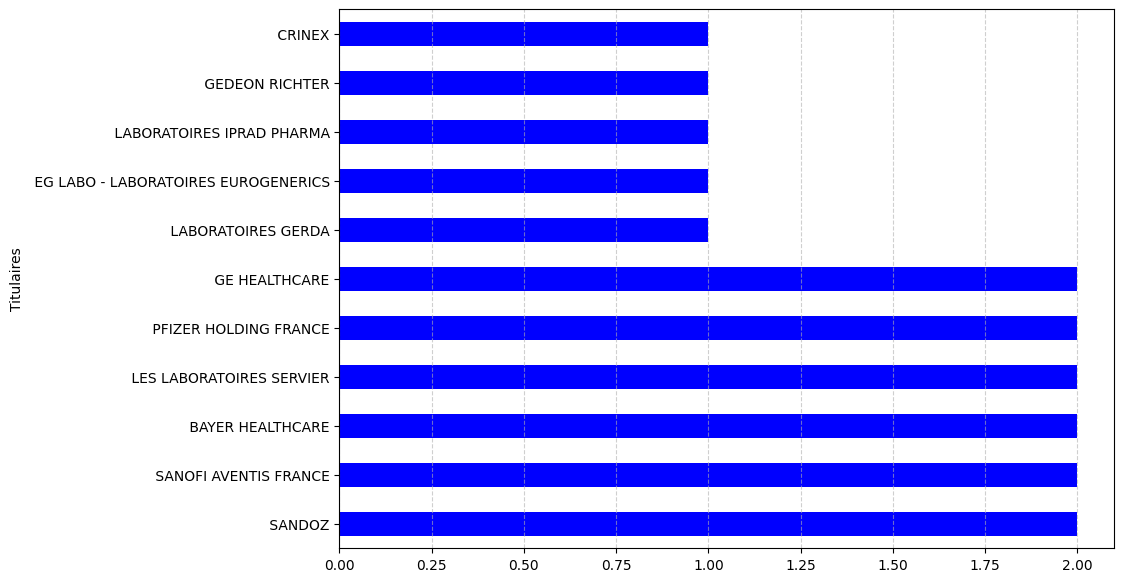

In [243]:
# Définition des statuts "dangereux"
statuts_dangereux = ['Autorisation suspendue', 'Autorisation retirée']

# Filtrage du DataFrame
df_dangereux = df_spe[df_spe['Statut Administratif'].isin(statuts_dangereux)]

# Comptage des médicaments par titulaire
titulaire_counts = df_dangereux['Titulaires'].value_counts()

# Création du graphique
plt.figure(figsize=(10, 7))

titulaire_counts.plot(kind='barh', color='blue')

# Ajout d'une grille pour la lecture
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

Affichez la répartition des formes (uniquement pour comprimé, sirop, creme) pour les médicaments suspendus ou retirés.

In [244]:
statuts_dangereux = ['Autorisation suspendue', 'Autorisation retirée']

df_dangereux = df_spe[df_spe['Statut Administratif'].isin(statuts_dangereux)]

# Création du tableau croisé
repartition_formes = pd.crosstab(df_dangereux['Forme Pharmaceutique'], df_dangereux['Statut Administratif'])

repartition_formes

Statut Administratif,Autorisation retirée,Autorisation suspendue
Forme Pharmaceutique,,
comprimé,0,2
comprimé enrobé,2,0
comprimé pelliculé,0,2
crème,1,0
granulés,1,0
pommade,1,0
sirop,1,0
solution buvable,1,0
solution injectable,0,4


Quels sont les 10 titulaires disposant du plus grand nombre de médicaments dont l'autorisation est active.

In [245]:
df_active = df_spe[df_spe['Statut Administratif'] == 'Autorisation active']

top_10_titulaires_actifs = df_active['Titulaires'].value_counts().head(10)

top_10_titulaires_actifs

,count
Titulaires,
MYLAN SAS,858
ARROW GENERIQUES,691
BIOGARAN,666
EG LABO - LABORATOIRES EUROGENERICS,574
BOIRON,564
SANDOZ,560
TEVA SANTE,536
ZENTIVA FRANCE,430
SANOFI AVENTIS FRANCE,388


On aimerait maintenant avoir une vue d'ensemble sur les statuts administratifs pour les plus grands fabricants. Affichez la répartition des statuts administratifs pour tous les médicaments des titulaires du top10.

In [246]:
# Identifier les noms des 10 plus gros titulaires
top_10_noms = df_spe[df_spe['Statut Administratif'] == 'Autorisation active']['Titulaires'].value_counts().head(10).index

df_top_10 = df_spe[df_spe['Titulaires'].isin(top_10_noms)]

# Créer un tableau croisé de la répartition des statuts
repartition_top_10 = pd.crosstab(df_top_10['Titulaires'], df_top_10['Statut Administratif'])

repartition_top_10

Statut Administratif,Autorisation abrogée,Autorisation active,Autorisation archivée,Autorisation retirée,Autorisation suspendue
Titulaires,,,,,
ARROW GENERIQUES,38,691,16,0,0
BIOGARAN,0,666,19,0,0
BOIRON,0,564,4,0,0
EG LABO - LABORATOIRES EUROGENERICS,30,574,0,0,1
LEHNING,4,357,0,0,0
MYLAN SAS,44,858,5,0,0
SANDOZ,17,560,2,0,2
SANOFI AVENTIS FRANCE,25,388,3,2,0
TEVA SANTE,113,536,6,0,0


Implémentez une fonction permettant de rechercher des médicaments par un mot clé présent dans la dénomination.

In [247]:
def rechercher_medicament(mot_cle, df=df_spe):
    """
    Recherche les médicaments dont la dénomination contient le mot-clé spécifié
    """
    resultat = df[df['Denomination'].str.contains(mot_cle, case=False, na=False)]

    return resultat

Utilisez la fonction pour chercher du paracetamol.

In [248]:
resultats_paracetamol = rechercher_medicament("paracetamol")
resultats_paracetamol

,Code CIS,Denomination,Forme Pharmaceutique,Voies Administration,Statut Administratif,Type Procedure,Etat Commercialisation,Date AMM,Statut Bdm,Numero Autorisation,Titulaires,Surveillance
3390,60475749,CLARIX ETAT GRIPPAL PARACETAMOL CHLORPHENAMINE...,poudre pour solution buvable,orale,Autorisation active,Procédure nationale,Non commercialisée,2014-03-30,Warning disponibilité,Inconnu,COOPER,Non
3599,61293112,"COQUELUSEDAL PARACETAMOL 100 mg, suppositoire",suppositoire,rectale,Autorisation active,Procédure nationale,Commercialisée,2006-12-04,Inconnu,Inconnu,ELERTE,Non
3600,63208057,"COQUELUSEDAL PARACETAMOL 250 mg, suppositoire",suppositoire,rectale,Autorisation active,Procédure nationale,Commercialisée,2009-07-15,Inconnu,Inconnu,ELERTE,Non
3601,64380679,"COQUELUSEDAL PARACETAMOL 500 mg, suppositoire",suppositoire,rectale,Autorisation active,Procédure nationale,Commercialisée,1995-12-12,Inconnu,Inconnu,ELERTE,Non
4324,69742445,DOLI ETAT GRIPPAL PARACETAMOL/VITAMINE C/PHENI...,poudre pour solution buvable,orale,Autorisation active,Procédure nationale,Non commercialisée,2014-02-05,Warning disponibilité,Inconnu,SANOFI AVENTIS FRANCE,Non
...,...,...,...,...,...,...,...,...,...,...,...,...
13976,69925400,"TRAMADOL/PARACETAMOL SANDOZ 37,5 mg/325 mg, co...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,2012-04-20,Inconnu,Inconnu,LABORATOIRES GRUNENTHAL,Non
13977,68322100,"TRAMADOL/PARACETAMOL TEVA 37.5 mg/325 mg, comp...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,2013-02-15,Inconnu,Inconnu,TEVA SANTE,Non
13978,61227411,"TRAMADOL/PARACETAMOL VENIPHARM 37,5 mg/325 mg,...",comprimé pelliculé,orale,Autorisation abrogée,Procédure nationale,Non commercialisée,2012-12-11,Warning disponibilité,Inconnu,VENIPHARM,Non
13979,63561242,"TRAMADOL/PARACETAMOL ZENTIVA 37,5 mg/325 mg, c...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,2012-04-20,Inconnu,Inconnu,LABORATOIRES GRUNENTHAL,Non


-----------

## Partie 2 - Analyse des prix
### 1 - Chargement des données

Téléchargez le fichier des présentations `CIS_CIP_bdpm.txt` disponible [ici](http://base-donnees-publique.medicaments.gouv.fr/telechargement.php?fichier=CIS_CIP_bdpm.txt) puis chargez le à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df_pres`.

Comme indiqué dans [la documentation des données](http://base-donnees-publique.medicaments.gouv.fr/docs/Contenu_et_format_des_fichiers_telechargeables_dans_la_BDM_v1.pdf), les colonnes du fichier sont uniquement séparées par des tabulations.

**Petit coup de pouce pour démarrer**, pour chacune des conditions suivantes, trouvez le paramètre de la fonction `read_csv` adapté :
- les colonnes sont séparées par des tabulations
- il n'y a pas de header (ligne contenant le nom des colonnes)
- l'encodage à utiliser est *iso-8859-1*

In [249]:
file_path_cis_cip_bdpm = '/content/drive/My Drive/Colab Notebooks/rendre/cis_cip_bdpm.txt'

df_pres = pd.read_csv(
    file_path_cis_cip_bdpm,
    sep='\t',
    header=None,
    encoding='iso-8859-1'
)

In [250]:
df_pres.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,60002283,4949729,plaquette(s) PVC PVDC aluminium de 30 comprimé(s),Présentation active,Déclaration de commercialisation,16/03/2011,3400949497294,oui,100%,"30,52","31,54","1,02",NaN
1,60002283,4949770,plaquette(s) PVC PVDC aluminium de 90 comprimé(s),Présentation active,Déclaration de commercialisation,19/09/2011,3400949497706,oui,100%,"86,20","87,22","1,02",NaN
2,60002504,3320863,tube(s) polypropylène de 30 comprimé(s),Présentation active,Déclaration de commercialisation,03/12/2003,3400933208639,oui,15%,"7,20","8,22","1,02",NaN
3,60003620,3696350,20 récipient(s) unidose(s) polyéthylène de 2 m...,Présentation active,Déclaration de commercialisation,30/11/2006,3400936963504,oui,65%,"27,60","28,62","1,02",Ce médicament peut être pris en charge ou remb...
4,60004277,3614582,plaquette(s) thermoformée(s) PVC aluminium de ...,Présentation active,Déclaration de commercialisation,11/06/2003,3400936145825,oui,65%,"1,54","2,56","1,02",NaN


Remplacez le nom des colonnes par le descriptif suivant :

In [251]:
colonnes_pres = [
    'Code CIS',
    'Code CIP7',
    'Libellé de la présentation',
    'Statut administratif de la présentation',
    'Etat de commercialisation',
    'Date de la déclaration de commercialisation',
    'Code CIP13',
    'Agrément aux collectivités',
    'Taux de remboursement',
    'Prix du médicament en euro',
    'Prix honoraire compris',
    'Honoraire',
    'Indications ouvrant droit au remboursement'
]

In [252]:
df_pres.columns = colonnes_pres
df_pres.head()

,Code CIS,Code CIP7,Libellé de la présentation,Statut administratif de la présentation,Etat de commercialisation,Date de la déclaration de commercialisation,Code CIP13,Agrément aux collectivités,Taux de remboursement,Prix du médicament en euro,Prix honoraire compris,Honoraire,Indications ouvrant droit au remboursement
0,60002283,4949729,plaquette(s) PVC PVDC aluminium de 30 comprimé(s),Présentation active,Déclaration de commercialisation,16/03/2011,3400949497294,oui,100%,"30,52","31,54","1,02",NaN
1,60002283,4949770,plaquette(s) PVC PVDC aluminium de 90 comprimé(s),Présentation active,Déclaration de commercialisation,19/09/2011,3400949497706,oui,100%,"86,20","87,22","1,02",NaN
2,60002504,3320863,tube(s) polypropylène de 30 comprimé(s),Présentation active,Déclaration de commercialisation,03/12/2003,3400933208639,oui,15%,"7,20","8,22","1,02",NaN
3,60003620,3696350,20 récipient(s) unidose(s) polyéthylène de 2 m...,Présentation active,Déclaration de commercialisation,30/11/2006,3400936963504,oui,65%,"27,60","28,62","1,02",Ce médicament peut être pris en charge ou remb...
4,60004277,3614582,plaquette(s) thermoformée(s) PVC aluminium de ...,Présentation active,Déclaration de commercialisation,11/06/2003,3400936145825,oui,65%,"1,54","2,56","1,02",NaN


Supprimez les colonnes suivantes ['Code CIP7', 'Code CIP13', 'Prix honoraire compris', 'Honoraire de dispensation']. On décide de supprimer la partie honoraire de dispensation car elle ne concerne pas le fabricant, mais la distribution par la pharmacie. [source](https://sante-pratique-paris.fr/a-savoir/comprendre-les-honoraires-de-dispensation-des-pharmaciens/)

In [253]:
colonnes_a_supprimer = [
    'Code CIP7',
    'Code CIP13',
    'Prix honoraire compris',
    'Honoraire'
]

df_pres = df_pres.drop(columns=colonnes_a_supprimer, errors='ignore')
df_pres.head()

,Code CIS,Libellé de la présentation,Statut administratif de la présentation,Etat de commercialisation,Date de la déclaration de commercialisation,Agrément aux collectivités,Taux de remboursement,Prix du médicament en euro,Indications ouvrant droit au remboursement
0,60002283,plaquette(s) PVC PVDC aluminium de 30 comprimé(s),Présentation active,Déclaration de commercialisation,16/03/2011,oui,100%,"30,52",NaN
1,60002283,plaquette(s) PVC PVDC aluminium de 90 comprimé(s),Présentation active,Déclaration de commercialisation,19/09/2011,oui,100%,"86,20",NaN
2,60002504,tube(s) polypropylène de 30 comprimé(s),Présentation active,Déclaration de commercialisation,03/12/2003,oui,15%,"7,20",NaN
3,60003620,20 récipient(s) unidose(s) polyéthylène de 2 m...,Présentation active,Déclaration de commercialisation,30/11/2006,oui,65%,"27,60",Ce médicament peut être pris en charge ou remb...
4,60004277,plaquette(s) thermoformée(s) PVC aluminium de ...,Présentation active,Déclaration de commercialisation,11/06/2003,oui,65%,"1,54",NaN


### 2 - Le dataframe

Combien de lignes et colonnes sont contenues dans `df_pres` ?

In [254]:
df_pres.shape

(20489, 9)

Maintenant il serait utile d'avoir quelques **info**rmations sur le type de chacune des colonnes.

In [255]:
df_pres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Code CIS                                     20489 non-null  int64 
 1   Libellé de la présentation                   20489 non-null  object
 2   Statut administratif de la présentation      20489 non-null  object
 3   Etat de commercialisation                    20489 non-null  object
 4   Date de la déclaration de commercialisation  20489 non-null  object
 5   Agrément aux collectivités                   20489 non-null  object
 6   Taux de remboursement                        12920 non-null  object
 7   Prix du médicament en euro                   12920 non-null  object
 8   Indications ouvrant droit au remboursement   951 non-null    object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB


La colonne Date Commercialisation qui est une date, n'est pas bien typée, corrigez cela en utilisant un type `datetime64`.

In [256]:
df_pres['Date de la déclaration de commercialisation'] = pd.to_datetime(
    df_pres['Date de la déclaration de commercialisation'],
    format='%d/%m/%Y',
    errors='coerce'
)

df_pres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Code CIS                                     20489 non-null  int64         
 1   Libellé de la présentation                   20489 non-null  object        
 2   Statut administratif de la présentation      20489 non-null  object        
 3   Etat de commercialisation                    20489 non-null  object        
 4   Date de la déclaration de commercialisation  20489 non-null  datetime64[ns]
 5   Agrément aux collectivités                   20489 non-null  object        
 6   Taux de remboursement                        12920 non-null  object        
 7   Prix du médicament en euro                   12920 non-null  object        
 8   Indications ouvrant droit au remboursement   951 non-null    object        
d

**Il y a encore 2 colonnes dont le type est incorrect, cependant avant de le corriger nous allons supprimer les valeurs manquantes.**

### 3 - Qualité des données

Quel est le pourcentage de valeurs manquantes par colonne ?

In [257]:
missing_values_pres = (df_pres.isnull().sum() / len(df_pres)) * 100

missing_values_pres

,0
Code CIS,0.000000
Libellé de la présentation,0.000000
Statut administratif de la présentation,0.000000
Etat de commercialisation,0.000000
Date de la déclaration de commercialisation,0.000000
Agrément aux collectivités,0.000000
Taux de remboursement,36.941774
Prix du médicament en euro,36.941774
Indications ouvrant droit au remboursement,95.358485


Supprimez les lignes dont le prix est manquant.

In [258]:
df_pres = df_pres.dropna(subset=['Prix du médicament en euro'])

df_pres.shape[0]

12920

Supprimez la colonne Texte Remboursement qui contient trop de valeurs manquantes.

In [259]:
df_pres = df_pres.drop(columns=['Indications ouvrant droit au remboursement'], errors='ignore')


Nous allons maintenant pouvoir corriger le type des colonnes `Prix hors honoraire` et `Taux de Remboursement`. Afin de ne pas passer trop de temps sur cette correction, le code est déjà implémenté pour vous !

In [260]:
def clean_price(price_str):
    if '.' in price_str:
        parts = price_str.split('.')
        return "".join(parts[:-1]) + "." + parts[-1]
    return price_str

df_pres['Prix du médicament en euro'] = df_pres['Prix du médicament en euro'].astype(str)
# On remplace la virgule par un point
df_pres['Prix du médicament en euro'] = df_pres['Prix du médicament en euro'].str.replace(',', '.')

df_pres['Prix du médicament en euro'] = df_pres['Prix du médicament en euro'].apply(clean_price)
# Conversion finale en float
df_pres['Prix du médicament en euro'] = pd.to_numeric(df_pres['Prix du médicament en euro'], errors='coerce')

# Nettoyage du Taux de remboursement
df_pres['Taux de remboursement'] = df_pres['Taux de remboursement'].astype(str).str.replace('%', '')
df_pres['Taux de remboursement'] = pd.to_numeric(df_pres['Taux de remboursement'], errors='coerce').fillna(0).astype(int)

df_pres[['Prix du médicament en euro', 'Taux de remboursement']].head()

,Prix du médicament en euro,Taux de remboursement
0,30.52,100
1,86.20,100
2,7.20,15
3,27.60,65
4,1.54,65


Ordonnez les lignes du dataframe en fonction de la date de commercialisation.

In [261]:
df_pres = df_pres.sort_values(by='Date de la déclaration de commercialisation')

df_pres[['Date de la déclaration de commercialisation', 'Libellé de la présentation']].head()

,Date de la déclaration de commercialisation,Libellé de la présentation
3173,1920-01-19,plaquette(s) PVC-Aluminium de 20 comprimé(s)
11083,1920-01-19,plaquette(s) PVC-Aluminium de 30 comprimé(s)
7745,1920-01-19,plaquette(s) PVC-Aluminium de 80 comprimé(s)
1294,1925-01-19,plaquette(s) PVC-Aluminium de 30 comprimé(s)
3409,1932-01-19,6 ampoule(s) en verre de 1 ml


Existe-t-il des duplicatas ? si oui, supprimez les.

In [262]:
def nettoyer_doublons(df):
  """
  Nettoie les doublons du dataframe
  """
  nb_doublons = df.duplicated().sum()

  if nb_doublons > 0:
      df_nettoye = df.drop_duplicates()
      print(f"{nb_doublons} doublons trouvés et supprimés.")
      return df_nettoye
  else:
      print("Aucun doublon détecté.")
      return df

In [263]:
df_pres = nettoyer_doublons(df_pres)

Aucun doublon détecté.


### 4 - Analyse des prix

Il est tant de valoriser les informations de la base des spécialisations `df_spe` avec le fichier des présentations. Pour cela réaliser une jointure avec le dataframe `df_pres`, on souhaite récupérer la dénomination, la forme pharmaceutique et le titulaire.

In [264]:
# Sélectionner uniquement les colonnes utiles de df_spe pour la jointure et on garde Code CIS pour la clé
df_spe_temp = df_spe[['Code CIS', 'Denomination', 'Forme Pharmaceutique', 'Titulaires']]

# Réaliser le merge
df_complet = pd.merge(df_pres, df_spe_temp, on='Code CIS', how='inner')

df_complet.head()

,Code CIS,Libellé de la présentation,Statut administratif de la présentation,Etat de commercialisation,Date de la déclaration de commercialisation,Agrément aux collectivités,Taux de remboursement,Prix du médicament en euro,Denomination,Forme Pharmaceutique,Titulaires
0,61475588,plaquette(s) PVC-Aluminium de 20 comprimé(s),Présentation active,Déclaration de commercialisation,1920-01-19,oui,65,1.72,"GARDENAL 100 mg, comprimé",comprimé,SANOFI AVENTIS FRANCE
1,65391080,plaquette(s) PVC-Aluminium de 30 comprimé(s),Présentation active,Déclaration de commercialisation,1920-01-19,oui,65,1.17,"GARDENAL 50 mg, comprimé",comprimé,SANOFI AVENTIS FRANCE
2,63707416,plaquette(s) PVC-Aluminium de 80 comprimé(s),Présentation active,Déclaration de commercialisation,1920-01-19,oui,65,2.53,"GARDENAL 10 mg, comprimé",comprimé,SANOFI AVENTIS FRANCE
3,60622868,plaquette(s) PVC-Aluminium de 30 comprimé(s),Présentation active,Déclaration de commercialisation,1925-01-19,oui,65,1.35,"ALEPSAL 50 mg, comprimé",comprimé,TEOFARMA
4,61601542,6 ampoule(s) en verre de 1 ml,Présentation active,Déclaration de commercialisation,1932-01-19,oui,65,2.33,"PROSTIGMINE 0,5 mg/1 ml, solution injectable",solution injectable,MEDA PHARMA


Quels sont les 5 médicaments commercialisés les plus chers ?

In [265]:
# Trier le DataFrame complet par prix décroissant puis sélectionner les 5 premières lignes
top_5_chers = df_complet.sort_values(by='Prix du médicament en euro', ascending=False).head(5)

top_5_chers

,Code CIS,Libellé de la présentation,Statut administratif de la présentation,Etat de commercialisation,Date de la déclaration de commercialisation,Agrément aux collectivités,Taux de remboursement,Prix du médicament en euro,Denomination,Forme Pharmaceutique,Titulaires
10294,69258437,"12 flacon(s) en verre de 0,8 ml",Présentation active,Déclaration de commercialisation,2018-01-18,oui,65,53140.9,"STRENSIQ 100 mg/ml, solution injectable",solution injectable,ALEXION EUROPE
10295,64450234,12 flacon(s) en verre de 1 ml,Présentation active,Déclaration de commercialisation,2018-01-18,oui,65,26642.2,"STRENSIQ 40 mg/ml, solution injectable",solution injectable,ALEXION EUROPE
11280,69565055,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2019-01-17,oui,65,20620.8,"LOJUXTA 20 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE)
11237,69851117,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2018-12-18,oui,65,20620.8,"LOJUXTA 5 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE)
11238,69243759,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2018-12-18,oui,65,20620.8,"LOJUXTA 10 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE)


On aimerait maintenant effectuer une vérification dans la base en ligne du médicament, afin d'en savoir plus sur le médicament le plus cher. **Voici le [lien](http://base-donnees-publique.medicaments.gouv.fr/index.php#result) vers la base en ligne.**

In [266]:
top_1 = df_complet.sort_values(by='Prix du médicament en euro', ascending=False).iloc[0]

print(f"Dénomination : {top_1['Denomination']}")
print(f"Code CIS : {top_1['Code CIS']}")
print(f"Prix calculé : {top_1['Prix du médicament en euro']} €")

Dénomination : STRENSIQ 100 mg/ml, solution injectable
Code CIS : 69258437
Prix calculé : 53140.9 €


Quels sont les 5 médicaments qui après remboursement restent les plus chers ? dans un premier temps, créez une nouvelle colonne indiquant le prix après remboursement, puis classez le dataframe en fonction de cette dernière.

In [267]:
def analyse_remboursement(df):
    """
    Calcule le prix après remboursement et retourne le dataframe trié
    """
    df['Prix après remboursement'] = df['Prix du médicament en euro'] * (1 - df['Taux de remboursement'] / 100)

    # Tri par prix restant décroissant
    df_tri = df.sort_values(by='Prix après remboursement', ascending=False)
    return df_tri

df_complet = analyse_remboursement(df_complet)
df_complet[['Denomination', 'Prix du médicament en euro', 'Taux de remboursement', 'Prix après remboursement']].head(5)

,Denomination,Prix du médicament en euro,Taux de remboursement,Prix après remboursement
10294,"STRENSIQ 100 mg/ml, solution injectable",53140.9,65,18599.315
10295,"STRENSIQ 40 mg/ml, solution injectable",26642.2,65,9324.770
11280,"LOJUXTA 20 mg, gélule",20620.8,65,7217.280
11238,"LOJUXTA 10 mg, gélule",20620.8,65,7217.280
11237,"LOJUXTA 5 mg, gélule",20620.8,65,7217.280


Quels sont les titulaires dont le prix moyen du médicament (en statuf actif) est le plus élevé ?

In [268]:
def top_titulaires_prix_moyen(df, n=5):
    """
    Calcule le prix moyen par titulaire pour les médicaments actifs et retourne les n premiers
    """
    df_actifs = df[df['Statut administratif de la présentation'] == 'Présentation active']
    moyennes = df_actifs.groupby('Titulaires')['Prix du médicament en euro'].mean()
    return moyennes.sort_values(ascending=False).head(n)

top_titulaires_prix_moyen(df_complet)

,Prix du médicament en euro
Titulaires,
ALEXION EUROPE,27635.925
AMRYT PHARMACEUTICALS (IRLANDE),20620.800
NOUVEAU DEMANDEUR,16081.400
VERTEX PHARMACEUTICALS (IRELAND),13456.100
ALIMERA SCIENCES EUROPE (IRLANDE),6035.800


Quels sont les titulaires dont le taux de remboursement moyen est le plus bas ?

In [269]:
# On utilise groupby sur les titulaires et on calcule la moyenne
classement_remboursement = df_complet.groupby('Titulaires')['Taux de remboursement'].mean()

# sélectionner les 10 premiers pour avoir un échantillon significatif
top_bas_remboursement = classement_remboursement.sort_values(ascending=True).head(10)
top_bas_remboursement

,Taux de remboursement
Titulaires,
AEROCID,15.0
ACINO FRANCE,15.0
PHARMA-RECHERCHE,15.0
BENE - ARZNEIMITTEL (ALLEMAGNE),15.0
CILFA DEVELOPPEMENT,15.0
BRIDOUX,15.0
BOIRON,15.0
SUNSTAR FRANCE,15.0
GIFRER BARBEZAT,15.0


## Bonus

On souhaite maintenant comparer les prix du paracetamol sous forme de comprimé pelliculé, dont l'autorisation de mise sur le marché est active et actuellement commercialisé.
Il existe 18 médicaments de ce type, trouvez les !

In [270]:
# Filtrage sur la dénomination Paracétamol
filtre_nom = df_complet['Denomination'].str.contains('PARACETAMOL', case=False, na=False)

# Filtrage sur la forme pharmaceutique comprimé pelliculé
filtre_forme = df_complet['Forme Pharmaceutique'].str.contains('comprimé pelliculé', case=False, na=False)

# Filtrage sur les statuts actif et commercialisé
filtre_statut = (df_complet['Statut administratif de la présentation'] == 'Présentation active') & \
                (df_complet['Etat de commercialisation'] == 'Déclaration de commercialisation')

# application des filtres et sélection des colonnes pour la comparaison
paracetamol_pellicule = df_complet[filtre_nom & filtre_forme & filtre_statut]

resultat = paracetamol_pellicule[['Denomination', 'Libellé de la présentation', 'Prix du médicament en euro', 'Titulaires']]
resultat.sort_values(by='Prix du médicament en euro')

,Denomination,Libellé de la présentation,Prix du médicament en euro,Titulaires
11842,"PARACETAMOL/CODEINE TEVA 500 mg/30 mg, comprim...",plaquettes PVC-Aluminium polyéthylène papier a...,1.72,TEVA (PAYS-BAS)
9039,"TRAMADOL/PARACETAMOL MYLAN GENERIQUES 37,5 mg/...",plaquette(s) PVC papier polytéréphtalate (PET)...,1.88,LABORATOIRES GRUNENTHAL
11054,"TRAMADOL/PARACETAMOL BGR 37,5 mg/325 mg, compr...",flacon(s) polyéthylène haute densité (PEHD) de...,1.88,BIOGARAN
6886,"TRAMADOL/PARACETAMOL TEVA 37.5 mg/325 mg, comp...",plaquette(s) PVC-Aluminium de 20 comprimé(s),1.88,TEVA SANTE
6960,"TRAMADOL/PARACETAMOL ARROW GENERIQUES 37,5 mg/...",plaquette(s) PVC-Aluminium de 20 comprimé(s),1.88,ARROW GENERIQUES
6951,"TRAMADOL/PARACETAMOL CRISTERS 37,5 mg/325 mg, ...",plaquette(s) PVC-Aluminium de 20 comprimé(s),1.88,CRISTERS
6925,TRAMADOL/PARACETAMOL RANBAXY PHARMACIE GENERIQ...,plaquette(s) PVC-Aluminium de 20 comprimé(s),1.88,RANBAXY PHARMACIE GENERIQUES
8653,"TRAMADOL/PARACETAMOL ARROW LAB 37,5 mg/325 mg,...",plaquette(s) PVC PVDC aluminium de 20 comprimé(s),1.88,ARROW GENERIQUES
7558,"TRAMADOL/PARACETAMOL EG LABO 37,5 mg/325 mg, c...",plaquette(s) PVC-Aluminium de 20 comprimé(s),1.88,EG LABO - LABORATOIRES EUROGENERICS
7946,"TRAMADOL/PARACETAMOL GERDA 37,5 mg/325 mg, com...",plaquette(s) PVC PVDC aluminium de 20 comprimé(s),1.88,LABORATOIRES GERDA


Écrivez une fonction qui pour un mot clé donné et une forme pharmaceutique donnée, retourne le prix moyen (avec honoraire) des médicaments commercialisés et actifs.

In [271]:
def calculer_prix_moyen_actif(mot_cle, forme_pharmaceutique, df):
    """
    Retourne le prix moyen des médicaments actifs et commercialisés en utilisant la colonne de prix disponible
    """
    # Création du masque de filtrage
    mask = (
        (df['Denomination'].str.contains(mot_cle, case=False, na=False)) &
        (df['Forme Pharmaceutique'].str.contains(forme_pharmaceutique, case=False, na=False)) &
        (df['Statut administratif de la présentation'] == 'Présentation active') &
        (df['Etat de commercialisation'] == 'Déclaration de commercialisation')
    )

    df_filtre = df[mask]

    # Vérification s'il y a des résultats
    if df_filtre.empty:
        return f"Aucun résultat pour '{mot_cle}' sous forme de '{forme_pharmaceutique}'."

    #Calcul de la moyenne sur le prix HT
    prix_moyen = df_filtre['Prix du médicament en euro'].mean()

    return round(prix_moyen, 2)


Testez cette fonction pour le paracetamol

In [272]:
resultat = calculer_prix_moyen_actif("Paracetamol", "comprimé", df_complet)
print(resultat)

1.35


### Conclusion

Nous n'avons pas encore mis en avant des faits précis, certains médicaments sont très coûteux, mais nous ne savons pas encore pour quelles raisons (identification des substances actives, rareté de la maladie). Cependant nous avons appris à nettoyer un jeu de données composé de plusieurs fichiers, afficher quelques informations importantes, mettre en place quelques fonctions pour extraire des données rapidement.

C'est donc la fin d'une première phase d'analyse orientée dans l'exploration.

**Les éléments mis en avant sont très subjectifs et ne peuvent pas permettre d'évaluer correctement de la qualité d'un médicament ou d'un fabricant. Pour établir un indicateur qualitatif, il faudrait dans un premier temps approfondir la recherche documentaire afin de lister les variables réflétant les bons ou mauvais comportements.**

### Pour aller plus loin

D'autres fichiers sont encore disponibles, par exemple le fichier des compositions, des avis rendus pour les autorités gouvernementales. On pourrait par exemple utiliser des méthodes d'analyse de texte afin de déterminer si certains avis sont positifs ou négatifs, calculer un score global par rapport à la présence de certaines substances actives.